# Body Fitness Prediction

**Introduction**  
    Sedentary lifestyle is defined by the absence of physical activity practices throughout the day and causes a decrease in caloric expenditure. This behavior is explained by the inappropriate lifestyle, for example, too much time sitting or lying down and still eating unhealthy foods during this time of immobilization.
    Currently, a third of the adult world population is physically inactive and this generates 5 million deaths per year (The LAncet, 2012). In addition to contributing to several chronic diseases, physical inactivity also influences mood, sleep quality and body weight.
    Thus, the objectives of choosing this database were:
* Check if there are associations between physical activity (by counting steps), caloric expenditure, body weight hours of sleep and the feeling of feeling active and / or inactive.
* Compare caloric expenditure between the categories of mood and self-perceived activity (active and inactive)
* Compare the hours of sleep between the categories of mood and self-perceived activity (active and inactive)
* Compare body weight between categories of self-perceived activity (active and inactive)
    
**Database**    
   The database has 96 observations, 7 columns. Its quantitative variables are "number of steps" (step_count), "caloric expenditure" (calories_burned), "hours of sleep" (hours_of_sleep and "body weight" (weight_kg). And qualitative variables "dates" (date), "mood" "(mood), self-perceived activity" active or inactive "(bool_of_active). The variable" humor "was assigned the value" 300 "to mean" Happy ", the value" 200 "for" Neutral "and" 100 "for" sad "and for the variable" self-perceived activity "the value of" 500 "was assigned to" active "and" 0 "to inactive.
   
**Methodology**
* Quantitative variables will be expressed in means and standard deviations
* Contingency tables of categorical variables will be exposed.
* A correlation matrix between variables will be presented
* Bar charts and violins to demonstrate the distribution of quantitative variables by categories
* Scatter plot for analysis of possible linear relationship between two variables

# Data Preprocessing

# Importing Libraries

In [94]:
#importing libraries
import pandas as pd
import numpy as np
#standard visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing Dataset

In [95]:
#Reading dataset
df=pd.read_csv(r"C:\Users\pavan\Downloads\Internship2020\Project\BodyFitnessPrediction.csv")
df

,date,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
0,06-10-2017,5464,200,181,5,0,66
1,07-10-2017,6041,100,197,8,0,66
2,08-10-2017,25,100,0,5,0,66
3,09-10-2017,5461,100,174,4,0,66
4,10-10-2017,6915,200,223,5,500,66
...,...,...,...,...,...,...,...
667,04-08-2019,133,100,4,3,0,64
668,05-08-2019,153,300,4,8,0,64
669,06-08-2019,500,200,7,5,500,64
670,07-08-2019,2127,200,87,5,0,64


# Exploratory Data Analysis

In [614]:
df.shape

(672, 7)

--> 672 rows and 7 columns

In [193]:
df.columns

Index(['date', 'step_count', 'mood', 'calories_burned', 'hours_of_sleep',
       'bool_of_active', 'weight_kg'],
      dtype='object')

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 7 columns):
date               672 non-null object
step_count         672 non-null int64
mood               672 non-null int64
calories_burned    672 non-null int64
hours_of_sleep     672 non-null int64
bool_of_active     672 non-null int64
weight_kg          672 non-null int64
dtypes: int64(6), object(1)
memory usage: 36.9+ KB


In [195]:
df.count()

date               672
step_count         672
mood               672
calories_burned    672
hours_of_sleep     672
bool_of_active     672
weight_kg          672
dtype: int64

--> There are no missing values

In [196]:
df.dtypes

date               object
step_count          int64
mood                int64
calories_burned     int64
hours_of_sleep      int64
bool_of_active      int64
weight_kg           int64
dtype: object

--> mood and bool_of_active are categorical variables but given as numerical values in datset.

In [197]:
df['mood'].unique()

array([200, 100, 300], dtype=int64)

300 --> "Happy"     
200 --> "Nuetral"     
100 --> "Sad"    

In [198]:
df['bool_of_active'].unique()

array([  0, 500], dtype=int64)

500 --> "Active"   
0   --> "Inactive"

In [199]:
df['weight_kg'].unique()

array([66, 65, 64], dtype=int64)

--> Only 3 unique values of weight i.e; there is no much change in weights

In [200]:
df['hours_of_sleep'].unique()

array([5, 8, 4, 6, 7, 3, 2, 9], dtype=int64)

**Observations :**   
1. Two variables *mood* and *bool_of_active* are categorical.
2. Remaining variables except date are continuos.

In [201]:
df.describe()

,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
count,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000
mean,2951.037202,219.196429,96.486607,5.391369,229.166667,64.254464
std,2151.796733,83.535566,71.914876,1.624179,249.316004,0.597419
min,25.000000,100.000000,0.000000,2.000000,0.000000,64.000000
25%,753.000000,100.000000,24.000000,4.000000,0.000000,64.000000
50%,3049.500000,200.000000,99.000000,5.000000,0.000000,64.000000
75%,4561.750000,300.000000,150.250000,6.000000,500.000000,64.000000
max,8109.000000,300.000000,254.000000,9.000000,500.000000,66.000000


**Descriptive Statistics :**

It is seen that the medians are very close to the averages, however this is not observed in categorical variables such as "mood", "bool_of_active".

In [202]:
df.corr()

,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
step_count,1.000000,0.278707,0.988923,0.155378,0.200615,0.103676
mood,0.278707,1.000000,0.268624,0.210364,0.407431,-0.402624
calories_burned,0.988923,0.268624,1.000000,0.152027,0.188440,0.107179
hours_of_sleep,0.155378,0.210364,0.152027,1.000000,0.142538,0.150635
bool_of_active,0.200615,0.407431,0.188440,0.142538,1.000000,-0.292042
weight_kg,0.103676,-0.402624,0.107179,0.150635,-0.292042,1.000000


**Observations :**  
1. We can observe that there is a high positive correlation between the *step_count* and *calories_burned* **(r = 0.98)** indicating a strong correlation.   
2. There is also a negative and moderate correlation between *mood* and *body_weight* **(r = -0.40)** and a moderate  positive correlation between the *feeling_of_active* and *mood* **(r = 0.41)**.

# Data Visualization :

# Univariate Analysis

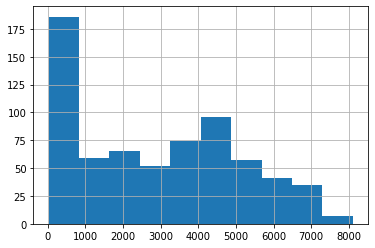

In [203]:
df['step_count'].hist()  #Histogram of step_count

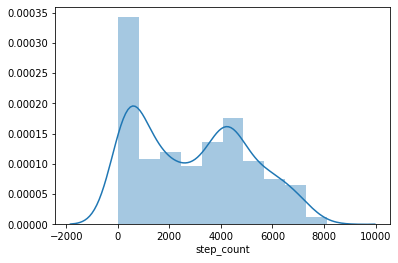

In [204]:
sns.distplot(df['step_count'])

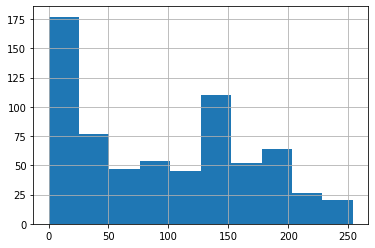

In [205]:
df['calories_burned'].hist()  #Histogram of calories_burned

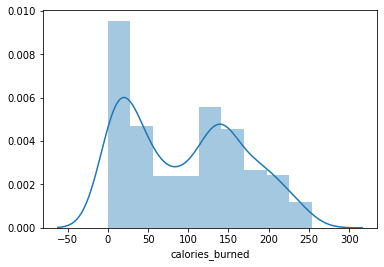

In [206]:
sns.distplot(df['calories_burned'])

--> Both variables show symmetric nature as they are positively correlated.

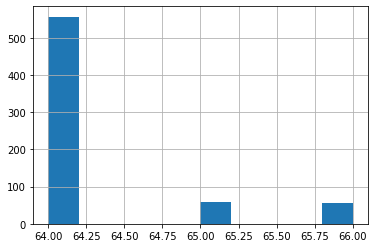

In [207]:
df['weight_kg'].hist()  #histogram of weight_kg

In [208]:
df['weight_kg'].value_counts() #Partiular value count of weights

64    557
65     59
66     56
Name: weight_kg, dtype: int64

--> Mostly, weight of a person in the dataset is 64.

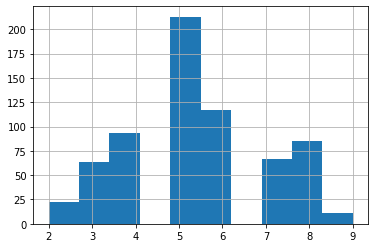

In [209]:
df['hours_of_sleep'].hist()  #Histogram of hours_of_sleep

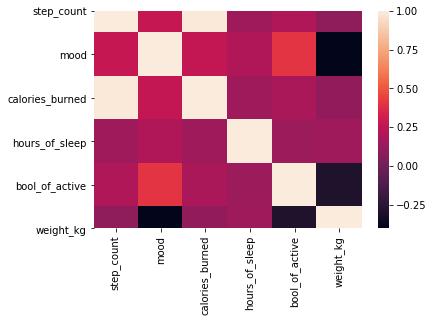

In [210]:
corr=df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)  #Heatmap

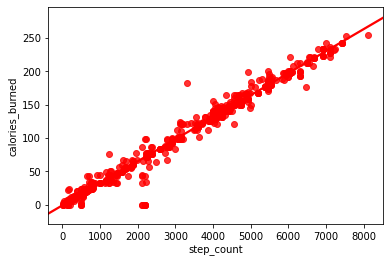

In [211]:
sns.regplot(x='step_count', y='calories_burned', data=df,color='r')  #Regression plot between step_count and calories_burned

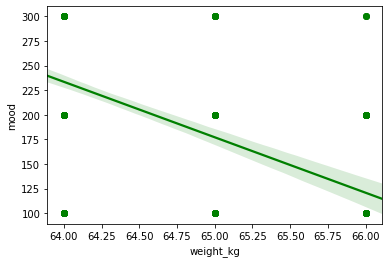

In [212]:
sns.regplot(x='weight_kg', y='mood', data=df,color='g')  #Regression plot between weight_kg and mood

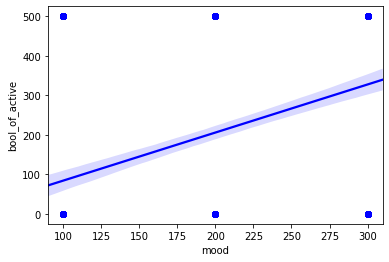

In [213]:
sns.regplot(x='mood', y='bool_of_active', data=df,color='b')  #Regression plot between mood and bool_of_active

1. Here mood and bool_of_active are categorical variables.   
2. So we cannot decide correlation by simply seeing regression between these variables

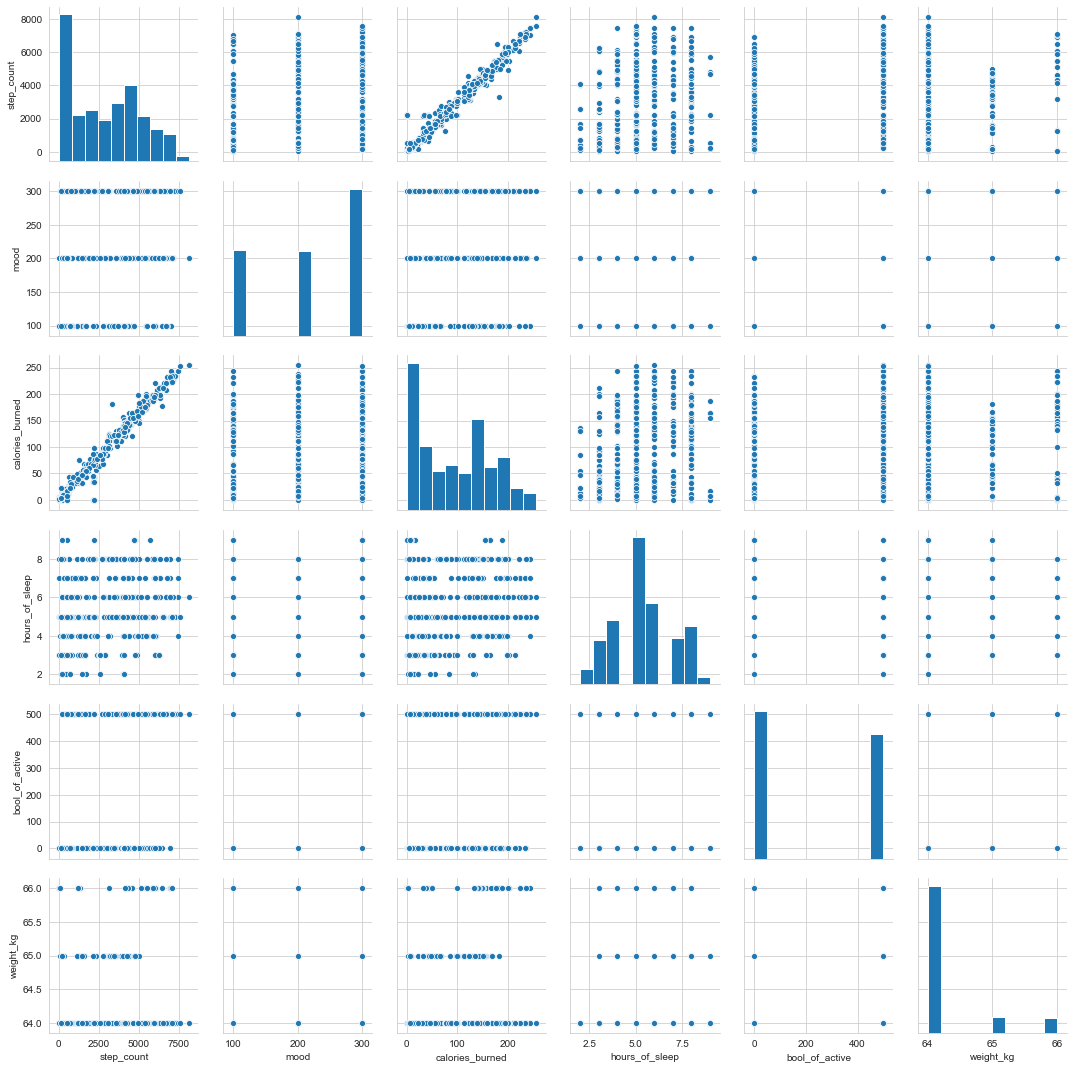

In [214]:
sns.set_style("whitegrid")
sns.pairplot(df)  #scatterplot of all variables

# Bivariate Analysis

# 1. Step count vs Mood

In [215]:
#Average_descriptive statistics of step count by mood category (100 = sad, 200 = neutral and 300 = happy)
df.step_count.groupby(df.mood).describe()

,count,mean,std,min,25%,50%,75%,max
mood,,,,,,,,
100,182.0,1990.126374,1970.094038,25.0,299.0,1230.0,3586.0,6999.0
200,179.0,3027.094972,2140.411734,25.0,1163.0,2909.0,4390.5,8109.0
300,311.0,3469.594855,2076.114290,111.0,1425.0,4033.0,4880.0,7543.0


<Figure size 432x360 with 0 Axes>

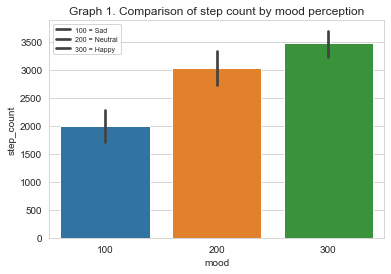

<Figure size 432x360 with 0 Axes>

In [216]:
# bar chart showing the distribution of the step count by mood category (100 = sad, 200 = neutral and 300 = happy)
sns.barplot(x = "mood", y="step_count", data = df)
plt.title('Graph 1. Comparison of step count by mood perception')
plt.legend(['100 = Sad', '200 = Neutral', '300 = Happy'], loc='upper left', prop={'size': 7})
plt.figure(figsize=(6,5))

# 2. Step Count vs Activeness

In [217]:
#Average descriptive statistics_ of step count by Activeness (0 = inactive and 500 = active)
df.step_count.groupby(df.bool_of_active).describe()

,count,mean,std,min,25%,50%,75%,max
bool_of_active,,,,,,,,
0,364.0,2554.241758,1996.747594,25.0,546.0,2255.0,4340.0,6930.0
500,308.0,3419.977273,2235.748340,221.0,1163.0,3608.0,5000.5,8109.0


<Figure size 432x360 with 0 Axes>

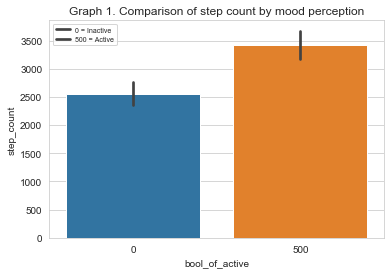

<Figure size 432x360 with 0 Axes>

In [218]:
# bar chart showing the distribution of step count by category of Activeness (0 = inactive and 500 = active)
sns.barplot(x = "bool_of_active", y="step_count", data = df)
plt.title('Graph 1. Comparison of step count by mood perception')
plt.legend(['0 = Inactive', '500 = Active'], loc='upper left', prop={'size': 7})
plt.figure(figsize=(6,5))

# 3. Calories Burned vs Mood

In [219]:
#Average descriptive statistics of CALORIES SPENT by mood category (100 = sad, 200 = neutral and 300 = happy)
df.calories_burned.groupby(df.mood).describe()

,count,mean,std,min,25%,50%,75%,max
mood,,,,,,,,
100,182.0,66.252747,65.101042,0.0,11.0,38.5,122.75,243.0
200,179.0,97.474860,72.416424,0.0,33.5,98.0,147.50,254.0
300,311.0,113.610932,69.837275,0.0,43.5,132.0,165.00,253.0


<Figure size 432x360 with 0 Axes>

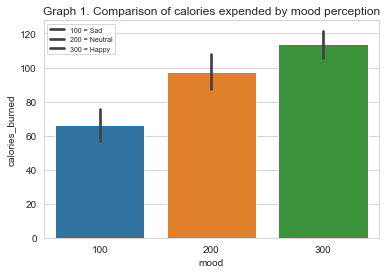

<Figure size 432x360 with 0 Axes>

In [220]:
# bar chart showing the distribution of SPENDED CALORIES by mood category (100 = sad, 200 = neutral and 300 = happy)
sns.barplot(x = "mood", y="calories_burned", data = df)
plt.title('Graph 1. Comparison of calories expended by mood perception')
plt.legend(['100 = Sad', '200 = Neutral', '300 = Happy'], loc='upper left', prop={'size': 7})
plt.figure(figsize=(6,5))

# 4. Calories Burned vs Activeness

In [221]:
#Average descriptive statistics_ of CALORIES SPENT by Activeness (0 = inactive and 500 = active)
df.calories_burned.groupby(df.bool_of_active).describe()

,count,mean,std,min,25%,50%,75%,max
bool_of_active,,,,,,,,
0,364.0,84.030220,66.986506,0.0,19.25,74.5,142.25,234.0
500,308.0,111.207792,74.810656,0.0,35.00,120.0,168.25,254.0


<Figure size 432x360 with 0 Axes>

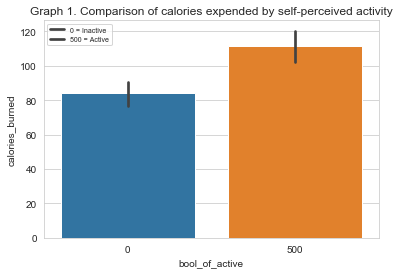

<Figure size 432x360 with 0 Axes>

In [222]:
# bar chart showing the distribution of EXPENDED CALORIES by category of Activeness (0 = inactive and 500 = active)
sns.barplot(x = "bool_of_active", y="calories_burned", data = df)
plt.title('Graph 1. Comparison of calories expended by self-perceived activity')
plt.legend(['0 = Inactive', '500 = Active'], loc='upper left', prop={'size': 7})
plt.figure(figsize=(6,5))

# 5. Sleeping Hours vs Mood

In [223]:
#Average descriptive statistics of HOURS OF SLEEP by mood category (100 = sad, 200 = neutral and 300 = happy)
df.hours_of_sleep.groupby(df.mood).describe()

,count,mean,std,min,25%,50%,75%,max
mood,,,,,,,,
100,182.0,5.093407,1.801491,2.0,4.0,5.0,6.0,9.0
200,179.0,4.927374,1.365827,2.0,4.0,5.0,6.0,8.0
300,311.0,5.832797,1.540115,2.0,5.0,6.0,7.0,9.0


<Figure size 432x360 with 0 Axes>

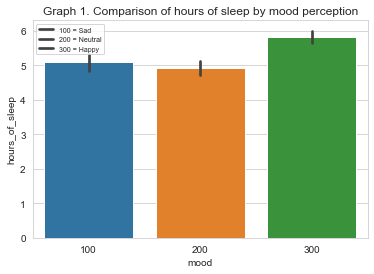

<Figure size 432x360 with 0 Axes>

In [224]:
# bar chart showing the distribution of SLEEP HOURS by mood category (100 = sad, 200 = neutral and 300 = happy)
sns.barplot(x = "mood", y="hours_of_sleep", data = df)
plt.title('Graph 1. Comparison of hours of sleep by mood perception')
plt.legend(['100 = Sad', '200 = Neutral', '300 = Happy'], loc='upper left', prop={'size': 7})
plt.figure(figsize=(6,5))

# 6. Sleeping Hours vs Activeness

In [225]:
#Average descriptive statistics of SLEEP HOURS by self-perceived activity (0 = inactive and 500 = active)
df.hours_of_sleep.groupby(df.bool_of_active).describe()

,count,mean,std,min,25%,50%,75%,max
bool_of_active,,,,,,,,
0,364.0,5.178571,1.706730,2.0,4.0,5.0,6.0,9.0
500,308.0,5.642857,1.484682,2.0,5.0,5.0,7.0,9.0


<Figure size 432x360 with 0 Axes>

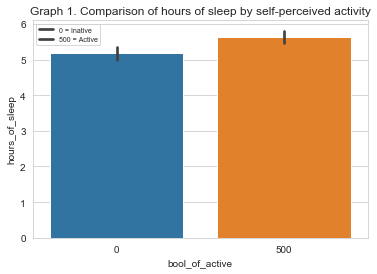

<Figure size 432x360 with 0 Axes>

In [226]:
# bar chart showing the distribution of SLEEP HOURS by category of self-perceived activity (0 = inactive and 500 = active)
sns.barplot(x = "bool_of_active", y="hours_of_sleep", data = df)
plt.title('Graph 1. Comparison of hours of sleep by self-perceived activity')
plt.legend(['0 = Inative', '500 = Active'], loc='upper left', prop={'size': 7})
plt.figure(figsize=(6,5))

# 7. Mood vs Activeness

In [227]:
# creating a contingency table between feeling active or inactive (bool_of_activity) x humor (mood) in percentage
pd.crosstab([df. bool_of_active], [df.mood], normalize='index', margins=True)*100

mood,100,200,300
bool_of_active,,,
0,42.582418,26.923077,30.494505
500,8.766234,26.298701,64.935065
All,27.083333,26.636905,46.279762


<Figure size 432x360 with 0 Axes>

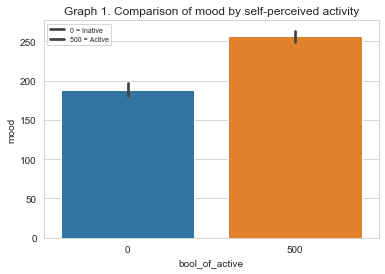

<Figure size 432x360 with 0 Axes>

In [228]:
# bar chart showing the distribution of MOOD by category of self-perceived activity (0 = inactive and 500 = active)
sns.barplot(x = "bool_of_active", y="mood", data = df)
plt.title('Graph 1. Comparison of mood by self-perceived activity')
plt.legend(['0 = Inative', '500 = Active'], loc='upper left', prop={'size': 7})
plt.figure(figsize=(6,5))

# Observations : 

1. It was observed that when comparing the level of physical activity by the step count, people who are "happy" showed greater level when compared to the categories of "sad" and "neutral".
2. In addition, "happy" people spend more energy (kilocalories) than "neutral" or "sad" people.
3. "happy" people demonstrate sleeping more hours of sleep when compared to the other categories. But "sad" people also sleep more hours than "neutral" people.
4. Self-perceived activity (activated / inactive) also demonstrates differences in the case of the level of physical activity (by counting steps), "active" people tend to walk more steps, spend more calories and sleep more hours when compared to people self - called "inactive".
5. Finally, the association between self-perception of activity with Mood, 46% of the people considered "sad" are "inactive" and 57% of the "happy" people are considered "active".


**Jessica Selinger's study (Current Biology, 2015) reports on the "law of least effort" and demonstrates that the body adjusts to the least effort, as the brain "boycotts" efforts to save energy costs. Therefore, physically demanding of the body improves health and increases the disposition. It is known that the practice of regular physical activity is a leading intervention for better physical and mental health.**

# Mood vs Weight

In [229]:
#Average descriptive statistics of MOOD by Weight
df.weight_kg.groupby(df.mood).describe()

,count,mean,std,min,25%,50%,75%,max
mood,,,,,,,,
100,182.0,64.637363,0.821217,64.0,64.0,64.0,65.0,66.0
200,179.0,64.229050,0.568899,64.0,64.0,64.0,64.0,66.0
300,311.0,64.045016,0.249966,64.0,64.0,64.0,64.0,66.0


<Figure size 432x360 with 0 Axes>

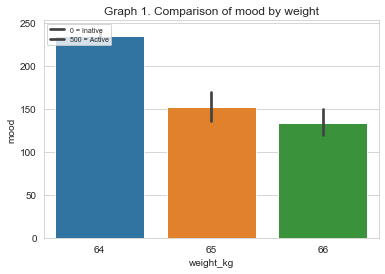

<Figure size 432x360 with 0 Axes>

In [230]:
# bar chart showing the distribution of MOOD by Weights
sns.barplot(x = "weight_kg", y="mood", data = df)
plt.title('Graph 1. Comparison of mood by weight')
plt.legend(['0 = Inative', '500 = Active'], loc='upper left', prop={'size': 7})
plt.figure(figsize=(6,5))

--> From the given data there is no much variance in weights. But some how we can say that less weight people tends to be more "happy" which inturn effects on activeness.

# **Final Observation :**

**We want to predict whether a person is *active* or *inactive* which is a *Binary classification* problem based on hours slept, mood, daily step count, calories burned and weight.**

# Taking care of missing values

In [231]:
df.isnull().any()

date               False
step_count         False
mood               False
calories_burned    False
hours_of_sleep     False
bool_of_active     False
weight_kg          False
dtype: bool

--> No missing values are present in the dataset

# Outlier analysis using Boxplot

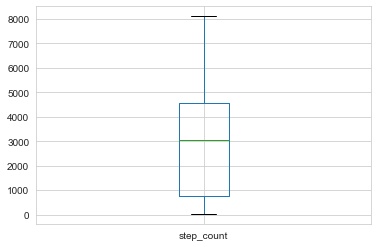

In [232]:
df.boxplot(column="step_count")  #Boxplot of Step_count

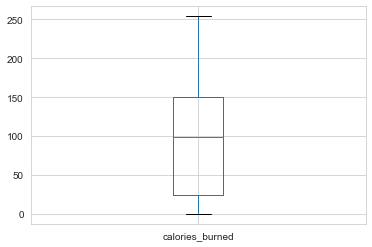

In [233]:
df.boxplot(column="calories_burned")  #Boxplot of Calories_burned

--> No outliers are present in dataset

# Label Encoding

1. "Mood" and "bool_of_active" are categorical variables but they are represented as   
--> bool_of_active : Active - 500 and Inactive - 0  
--> mood : 100 - sad, 200 - neutral and 300 - happy
2. Encode mood values as    
--> 100 - 0, 200 - 1 and 300 - 2
3. Encode bool_of_active values as    
--> 0 - 0 and 500 - 1

In [232]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['bool_of_active']=le.fit_transform(df['bool_of_active'])
df

,date,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
0,06-10-2017,5464,1,181,5,0,66
1,07-10-2017,6041,0,197,8,0,66
2,08-10-2017,25,0,0,5,0,66
3,09-10-2017,5461,0,174,4,0,66
4,10-10-2017,6915,1,223,5,1,66
...,...,...,...,...,...,...,...
667,04-08-2019,133,0,4,3,0,64
668,05-08-2019,153,2,4,8,0,64
669,06-08-2019,500,1,7,5,1,64
670,07-08-2019,2127,1,87,5,0,64


In [233]:
df['mood']=le.fit_transform(df['mood'])
df

,date,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
0,06-10-2017,5464,1,181,5,0,66
1,07-10-2017,6041,0,197,8,0,66
2,08-10-2017,25,0,0,5,0,66
3,09-10-2017,5461,0,174,4,0,66
4,10-10-2017,6915,1,223,5,1,66
...,...,...,...,...,...,...,...
667,04-08-2019,133,0,4,3,0,64
668,05-08-2019,153,2,4,8,0,64
669,06-08-2019,500,1,7,5,1,64
670,07-08-2019,2127,1,87,5,0,64


# Dependent and Independent variables

In [234]:
#Independent variables
x=df.iloc[:,[1,2,3,4,6]]
x

,step_count,mood,calories_burned,hours_of_sleep,weight_kg
0,5464,1,181,5,66
1,6041,0,197,8,66
2,25,0,0,5,66
3,5461,0,174,4,66
4,6915,1,223,5,66
...,...,...,...,...,...
667,133,0,4,3,64
668,153,2,4,8,64
669,500,1,7,5,64
670,2127,1,87,5,64


In [235]:
#Dependent Variable
y=df.iloc[:,5]
y

0      0
1      0
2      0
3      0
4      1
      ..
667    0
668    0
669    1
670    0
671    1
Name: bool_of_active, Length: 672, dtype: int64

# Onehot encoding : 

sad(0) --> 0 0   
neutral(1) --> 1 0   
happy(2) --> 0 1  

In [236]:
from sklearn.preprocessing import OneHotEncoder
oh=OneHotEncoder(categorical_features=[1])
x=oh.fit_transform(x).toarray()  

C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [237]:
x

array([[  0.,   1.,   0., ..., 181.,   5.,  66.],
       [  1.,   0.,   0., ..., 197.,   8.,  66.],
       [  1.,   0.,   0., ...,   0.,   5.,  66.],
       ...,
       [  0.,   1.,   0., ...,   7.,   5.,  64.],
       [  0.,   1.,   0., ...,  87.,   5.,  64.],
       [  0.,   0.,   1., ...,  98.,   5.,  64.]])

In [238]:
x=x[:,1:]
x

array([[1.000e+00, 0.000e+00, 5.464e+03, 1.810e+02, 5.000e+00, 6.600e+01],
       [0.000e+00, 0.000e+00, 6.041e+03, 1.970e+02, 8.000e+00, 6.600e+01],
       [0.000e+00, 0.000e+00, 2.500e+01, 0.000e+00, 5.000e+00, 6.600e+01],
       ...,
       [1.000e+00, 0.000e+00, 5.000e+02, 7.000e+00, 5.000e+00, 6.400e+01],
       [1.000e+00, 0.000e+00, 2.127e+03, 8.700e+01, 5.000e+00, 6.400e+01],
       [0.000e+00, 1.000e+00, 2.203e+03, 9.800e+01, 5.000e+00, 6.400e+01]])

# Splitting dataset into train and test sets (90-10) : 

In [365]:
#Splitting the dataset into Train set and Test set
from sklearn import model_selection, neighbors
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=0)
x_train1=x_train
x_test1=x_test

# Feature Scaling

In [366]:
#Apply normalization to rescale the features to a standard range of values.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [367]:
x_train

array([[ 1.68011452, -0.94207218, -1.15992048, -1.26376434, -0.24541261,
        -0.42761284],
       [-0.59519752,  1.06148978,  0.07183731,  0.05451824, -0.24541261,
        -0.42761284],
       [ 1.68011452, -0.94207218,  0.66492329,  0.64353811, -0.85540938,
         1.24951803],
       ...,
       [-0.59519752,  1.06148978,  1.17294701,  1.17646086, -0.24541261,
         2.92664889],
       [-0.59519752, -0.94207218, -0.84833886, -0.87108442,  0.36458416,
        -0.42761284],
       [-0.59519752, -0.94207218, -1.04102131, -0.9692544 , -0.24541261,
        -0.42761284]])

In [368]:
x_test

array([[-0.59519752, -0.94207218,  0.54273442,  0.489271  ,  0.36458416,
         2.92664889],
       [ 1.68011452, -0.94207218, -1.25767158, -1.20766721, -0.24541261,
        -0.42761284],
       [-0.59519752, -0.94207218, -0.65236672, -0.67474446, -0.24541261,
         1.24951803],
       [-0.59519752, -0.94207218, -1.01893332, -1.01132725, -0.85540938,
        -0.42761284],
       [ 1.68011452, -0.94207218,  0.28519788,  0.26488248, -0.24541261,
        -0.42761284],
       [-0.59519752,  1.06148978,  2.09312319,  2.04596638,  1.5845777 ,
        -0.42761284],
       [-0.59519752,  1.06148978,  0.67197264,  0.71365953, -0.24541261,
        -0.42761284],
       [-0.59519752,  1.06148978,  0.04598967,  0.02646967, -0.85540938,
        -0.42761284],
       [ 1.68011452, -0.94207218,  1.65982266,  1.61121362, -0.24541261,
        -0.42761284],
       [ 1.68011452, -0.94207218,  0.08922573,  0.05451824, -0.24541261,
        -0.42761284],
       [-0.59519752,  1.06148978, -1.14159215, -1.

# Model Building : 

# Training Model

# 1. KNN Classification

In [369]:
import pickle

In [370]:
#Fitting Classifier to the Training set
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train1,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [371]:
#Saving model
pickle.dump(knn, open('knnmodel.pkl','wb'))

In [372]:
knn_y_train=knn.predict(x_train1)
knn_y_train

array([1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,

In [373]:
knn.score(x_train1,y_train)*100

85.76158940397352

In [374]:
#confusion matrix
from sklearn.metrics import confusion_matrix
knn_cm_train = confusion_matrix(y_train,knn_y_train)
knn_cm_train

array([[286,  40],
       [ 46, 232]], dtype=int64)

In [375]:
#Cross Validation
from sklearn.model_selection import cross_val_score, cross_val_predict
knn_acc = cross_val_score(knn, x_train1, y_train, cv=6, scoring='accuracy', n_jobs=-1)
knn_proba = cross_val_predict(knn, x_train1, y_train, cv=6, method='predict_proba')
knn_scores = knn_proba[:, 1]

In [376]:
knn_acc*100

array([84.31372549, 76.47058824, 77.        , 73.        , 78.        ,
       81.        ])

In [377]:
knn_acc.mean()*100

78.29738562091502

# 2. Logistic Regression Classification

In [378]:
from sklearn.linear_model.logistic import LogisticRegression
lg =LogisticRegression(solver='lbfgs')
lg.fit(x_train1, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [379]:
pickle.dump(lg, open('lgmodel.pkl','wb'))

In [380]:
lg_y_train = lg.predict(x_train1)
lg_y_train

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,

In [381]:
lg.score(x_train1,y_train)*100

67.3841059602649

In [382]:
confusion_matrix(y_train, lg_y_train)

array([[208, 118],
       [ 79, 199]], dtype=int64)

In [383]:
lg_acc = cross_val_score(lg, x_train1, y_train, cv=6, scoring='accuracy', n_jobs=-1)
lg_proba = cross_val_predict(lg, x_train1, y_train, cv=6, method='predict_proba')
lg_scores = lg_proba[:, 1]

C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [384]:
lg_acc*100

array([68.62745098, 67.64705882, 64.        , 68.        , 71.        ,
       62.        ])

In [385]:
lg_acc.mean()*100

66.87908496732025

# 3. Naive Bayes Classification

In [386]:
from sklearn.naive_bayes import GaussianNB
nb =GaussianNB()
nb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [387]:
pickle.dump(nb, open('nbmodel.pkl','wb'))

In [388]:
nb_y_train=nb.predict(x_train)  #for train
nb_y_train

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,

In [389]:
nb.score(x_train,y_train)*100

67.05298013245033

In [390]:
confusion_matrix(y_train,nb_y_train)

array([[194, 132],
       [ 67, 211]], dtype=int64)

In [391]:
nb_acc = cross_val_score(nb, x_train, y_train, cv=6, scoring='accuracy', n_jobs=-1)
nb_proba = cross_val_predict(nb, x_train, y_train, cv=6, method='predict_proba')
nb_scores = nb_proba[:, 1]

In [392]:
nb_acc*100

array([68.62745098, 68.62745098, 59.        , 70.        , 70.        ,
       65.        ])

In [393]:
nb_acc.mean()*100

66.87581699346406

# 4. Support Vector Machines Classification

In [394]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf',probability=True,degree=3,gamma='auto')
svc.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [395]:
pickle.dump(svc, open('svcmodel.pkl','wb'))

In [396]:
svc_y_train=svc.predict(x_train)
svc_y_train

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,

In [397]:
svc.score(x_train,y_train)*100

73.17880794701986

In [398]:
svc_cm_train = confusion_matrix(y_train, svc_y_train)
svc_cm_train

array([[206, 120],
       [ 42, 236]], dtype=int64)

In [399]:
svm_acc = cross_val_score(svc, x_train, y_train, cv=6, scoring='accuracy', n_jobs=-1)
svm_proba = cross_val_predict(svc, x_train, y_train, cv=6, method='predict_proba')
svm_scores = svm_proba[:, 1]

In [400]:
svm_acc*100

array([77.45098039, 68.62745098, 64.        , 70.        , 76.        ,
       66.        ])

In [401]:
svm_acc.mean()*100

70.34640522875817

# 5. Decision Tree Classification

In [402]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=12)   #max_leaf_nodes=26  max_depth=12
dtc.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [403]:
pickle.dump(dtc, open('dtcmodel.pkl','wb'))

In [404]:
dtc.score(x_train,y_train)*100

96.02649006622516

In [405]:
dtc_y_train=dtc.predict(x_train)
dtc_y_train

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,

In [406]:
confusion_matrix(y_train, dtc_y_train)

array([[313,  13],
       [ 11, 267]], dtype=int64)

In [407]:
#Print cross validation score for Decision Tree Calssifier
dtc_clf_acc = cross_val_score(dtc, x_train, y_train, cv=5, scoring="accuracy",  n_jobs=-1)
dtc_proba = cross_val_predict(dtc, x_train, y_train, cv=5, method='predict_proba')
dtc_scores = dtc_proba[:, 1]

In [408]:
dtc_clf_acc*100

array([87.70491803, 76.03305785, 81.81818182, 80.83333333, 73.33333333])

In [409]:
dtc_clf_acc.mean()*100

79.94456487377502

# 6. Random Forest Classification

In [410]:
from sklearn.ensemble import RandomForestClassifier
rmf = RandomForestClassifier(max_depth=12,n_estimators=10,random_state=0)  #max_depth=12
rmf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=12, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [411]:
pickle.dump(rmf, open('rmfmodel.pkl','wb'))

In [412]:
rmf.score(x_train,y_train)*100

95.52980132450331

In [413]:
rmf_y_train=rmf.predict(x_train)
rmf_y_train

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,

In [414]:
confusion_matrix(y_train, rmf_y_train)

array([[308,  18],
       [  9, 269]], dtype=int64)

In [427]:
rmf_clf_acc = cross_val_score(rmf, x_train, y_train, cv=5, scoring="accuracy",  n_jobs=-1)
rmf_proba = cross_val_predict(rmf, x_train, y_train, cv=5, method='predict_proba')
rmf_scores = rmf_proba[:, 1]

In [428]:
rmf_clf_acc*100

array([84.42622951, 79.33884298, 87.60330579, 75.83333333, 80.        ])

In [429]:
rmf_clf_acc.mean()*100

81.44034232037214

# 7. Gradient Boosting Classification

In [430]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(max_depth=3)
gb.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [431]:
pickle.dump(gb, open('gbmodel.pkl','wb'))

In [432]:
gb.score(x_train,y_train)*100

93.54304635761589

In [433]:
gb_y_train=gb.predict(x_train)
gb_y_train

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,

In [434]:
confusion_matrix(y_train, gb_y_train)

array([[301,  25],
       [ 14, 264]], dtype=int64)

In [462]:
gb_clf_acc = cross_val_score(gb, x_train, y_train, cv=4, scoring="accuracy",  n_jobs=-1)
gb_proba = cross_val_predict(gb, x_train, y_train, cv=4, method='predict_proba')
gb_scores = gb_proba[:, 1]

In [463]:
gb_clf_acc*100

array([84.86842105, 87.5       , 82.        , 80.        ])

In [464]:
gb_clf_acc.mean()*100

83.5921052631579

# ROC Curves on Train data: 

In [465]:
def ROC_curve(title, y_train, scores, y_train_pred, label=None):
    # calculate the ROC score
    fpr, tpr, thresholds = roc_curve(y_train, scores)
    print('AUC Score ({}): {:.2f} '.format(title, roc_auc_score(y_train, scores)*100))
    print()
    print('Train Accuracy : ',accuracy_score(y_train,y_train_pred)*100)
    
    # plot the ROC curve
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, linewidth=2, label=label, color='b')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC Curve: {}'.format(title), fontsize=16)
    plt.show()

AUC Score (kNN): 83.59 

Train Accuracy :  85.76158940397352


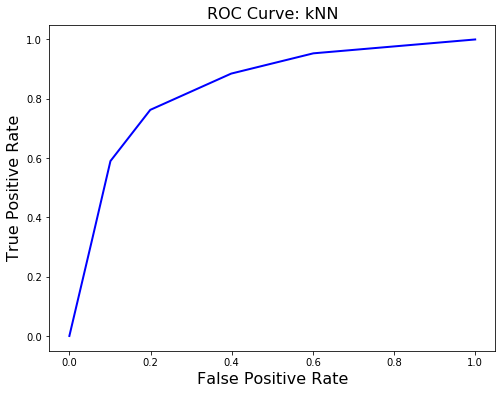

AUC Score (Logistic Regression): 72.13 

Train Accuracy :  67.3841059602649


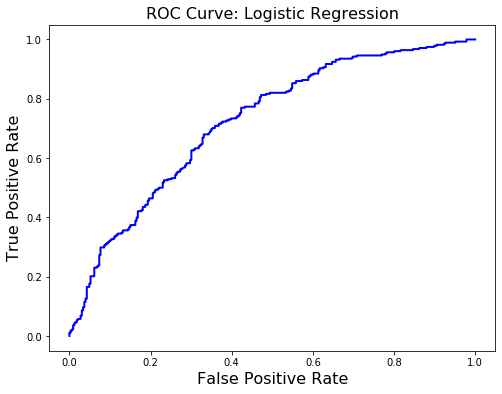

AUC Score (Naive Bayes): 73.04 

Train Accuracy :  67.05298013245033


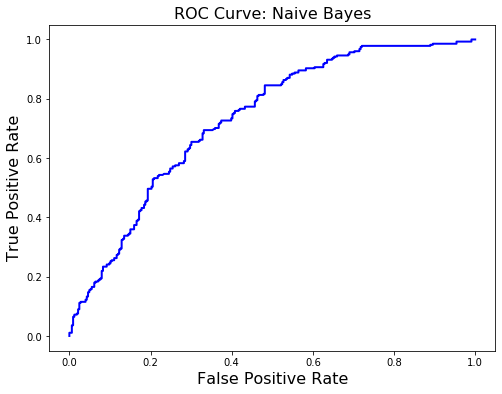

AUC Score (Support Vector Classifiaction): 77.13 

Train Accuracy :  73.17880794701986


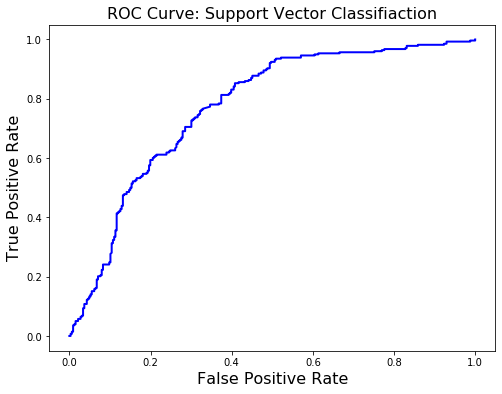

AUC Score (Decision Tree Calssifier): 81.56 

Train Accuracy :  96.02649006622516


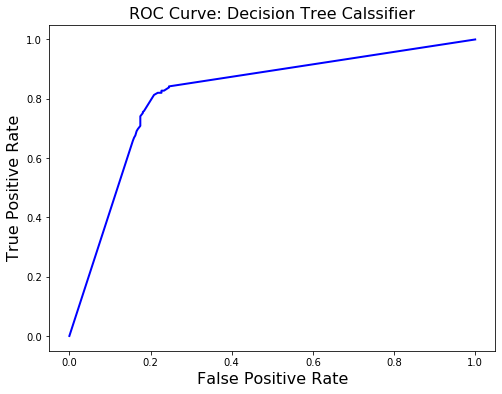

AUC Score (Random Forest Classifier): 89.22 

Train Accuracy :  95.52980132450331


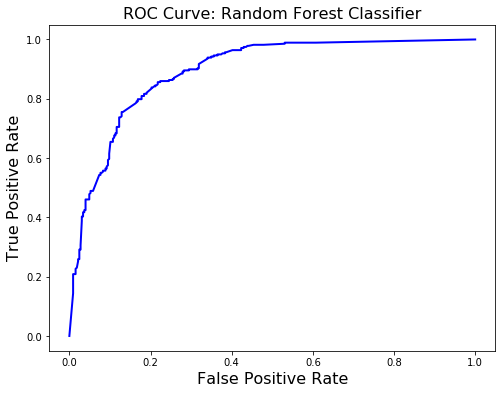

AUC Score (Gradient Boosting Classifier): 89.39 

Train Accuracy :  93.54304635761589


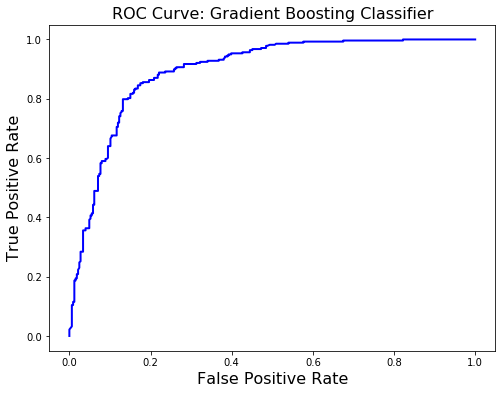

In [466]:
ROC_curve('kNN',y_train,knn_scores,knn_y_train)
ROC_curve('Logistic Regression',y_train,lg_scores,lg_y_train)
ROC_curve('Naive Bayes',y_train,nb_scores,nb_y_train)
ROC_curve('Support Vector Classifiaction',y_train,svm_scores,svc_y_train)
ROC_curve('Decision Tree Calssifier',y_train,dtc_scores,dtc_y_train)
ROC_curve('Random Forest Classifier',y_train,rmf_scores,rmf_y_train)
ROC_curve('Gradient Boosting Classifier',y_train,gb_scores,gb_y_train)

# Observations : 

**Top performance Algorithms on train data :**  
1. Gradient Boosting Classifier
2. Random Forest Classifier
3. KNN Classifier
4. Decision Tree Classifier

**On this traindata, *Gradient Boosting Classifer* gives more accuracy and ROC score.**